# **Import Libraries and modules**

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


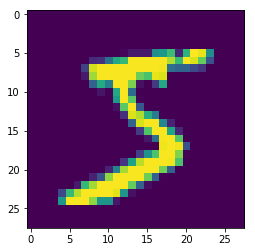

In [8]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Now that we know that from our observations from the last notebook ,it gave me the val Accuracy of 99.4 while training with the same batch size , 
###Increments 

            1)Trying to train on a larger batch size(experiment with batch size)
            2) Trying to reduce the parameters in order to fit into the required constraint of < 15K  ,
            3) We can observe that in previous network for the last convolution before flatten we were creating way too many parameters for the network ,and here there is scope of reducing parameters by adding one more conv and then keeping everything same,i.e,
            also from the previous notebook's observations we get to know that the dropouts are very well suiting the network bcause the gap between training and vall accuracy is not getting bigger ,same with the loss ,they are very much nearby,
            Hence we need not worry about dropout values now

In [0]:
def ConvBnDropout(model,size,dout=0.2,K=(3,3)):
  
  model.add(Convolution2D(size, kernel_size=K, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dout))
  return model  
  
  
  

In [0]:
from keras.layers import *

In [20]:

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model=ConvBnDropout(model,16)
model=ConvBnDropout(model,24)

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model=ConvBnDropout(model,10,0,K=(1,1))

model=ConvBnDropout(model,16)
model=ConvBnDropout(model,16)
model=ConvBnDropout(model,10)
# model=ConvBnDropout(model,16)


# model=ConvBnDropout(model,10,0,K=(1,1))

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 24)        3480      
_________________________________________________________________
batch_normalization_18 (Batc (None, 22, 22, 24)        96        
__________

Adding checkpoints 

In [0]:
from keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
filepath="Best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [26]:
model.fit(X_train, Y_train, batch_size=32, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test),callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 422us/step - loss: 0.2642 - acc: 0.9164 - val_loss: 0.0848 - val_acc: 0.9745

Epoch 00001: val_acc improved from -inf to 0.97450, saving model to Best_weights.hdf5
Epoch 2/20
60000/60000 [==============================] - 21s 356us/step - loss: 0.0973 - acc: 0.9703 - val_loss: 0.0662 - val_acc: 0.9799

Epoch 00002: val_acc improved from 0.97450 to 0.97990, saving model to Best_weights.hdf5
Epoch 3/20
60000/60000 [==============================] - 21s 355us/step - loss: 0.0736 - acc: 0.9768 - val_loss: 0.0491 - val_acc: 0.9853

Epoch 00003: val_acc improved from 0.97990 to 0.98530, saving model to Best_weights.hdf5
Epoch 4/20
60000/60000 [==============================] - 21s 355us/step - loss: 0.0642 - acc: 0.9797 - val_loss: 0.0398 - val_acc: 0.9871

Epoch 00004: val_acc improved from 0.98530 to 0.98710, saving model to Best_we

## Changing the batch size to 128 and checking the difference

In [27]:
model.fit(X_train, Y_train, batch_size=128, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test),callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0234 - acc: 0.9927 - val_loss: 0.0177 - val_acc: 0.9942

Epoch 00001: val_acc improved from 0.99370 to 0.99420, saving model to Best_weights.hdf5
Epoch 2/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0229 - acc: 0.9931 - val_loss: 0.0171 - val_acc: 0.9942

Epoch 00002: val_acc did not improve from 0.99420
Epoch 3/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0206 - acc: 0.9935 - val_loss: 0.0175 - val_acc: 0.9946

Epoch 00003: val_acc improved from 0.99420 to 0.99460, saving model to Best_weights.hdf5
Epoch 4/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0219 - acc: 0.9927 - val_loss: 0.0160 - val_acc: 0.9949

Epoch 00004: val_acc improved from 0.99460 to 0.99490, saving model to Best_weights.hdf5
Epoch 5/20
60000/60000 [==============================] - 7s 121us/step - los

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [29]:
print(score)


[0.01787526904119295, 0.9941]


In [33]:
import keras
model1=keras.models.load_model('Best_weights.hdf5')
print(model1.evaluate(X_test, Y_test, verbose=0))

[0.015969968815942412, 0.9949]


In [0]:
y_pred = model.predict(X_test)

In [35]:
print(y_pred[:9])
print(y_test[:9])

[[4.3011519e-12 2.0400837e-09 9.4525232e-09 2.0214528e-09 1.4130243e-10
  5.2715905e-12 1.5116304e-15 9.9999988e-01 2.2539430e-11 6.4747496e-08]
 [3.4494468e-07 2.4400260e-06 9.9999630e-01 6.3118866e-10 1.1849448e-09
  1.3814011e-13 9.5963651e-07 1.6017560e-10 3.9350905e-08 3.2446202e-11]
 [6.5965677e-09 9.9997270e-01 1.9383947e-07 9.2965102e-10 1.2270190e-05
  6.4869687e-07 1.1034879e-07 1.3420979e-05 3.4714961e-07 2.9357363e-07]
 [9.9990356e-01 4.0281979e-11 1.3302603e-07 6.3067436e-09 2.1140515e-08
  1.6101135e-06 9.3284398e-05 6.3686201e-10 4.6985582e-07 9.4446119e-07]
 [3.2238236e-11 9.7843317e-11 1.7377487e-12 2.2957981e-12 9.9999952e-01
  5.0618707e-11 7.9119289e-09 4.4609488e-10 7.9032664e-10 4.5653593e-07]
 [4.3308619e-09 9.9993753e-01 2.0324871e-06 1.1788923e-09 1.3742736e-05
  4.5463228e-08 1.5545895e-07 4.4672484e-05 1.3489064e-07 1.6673930e-06]
 [5.6242226e-11 2.0610573e-06 2.3512188e-08 5.8426361e-11 9.9997270e-01
  2.8876830e-08 3.5859993e-09 5.6422446e-06 1.0756666e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

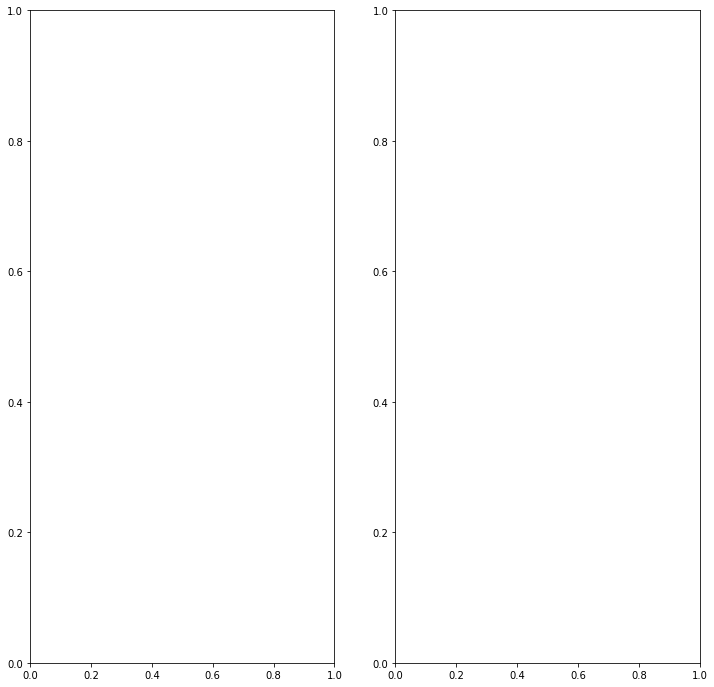

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_24'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()